![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Project I | Deep Learning: Image Classification with CNN

## Task Description

Students will build a Convolutional Neural Network (CNN) model to classify images from a given dataset into predefined categories/classes.

## Datasets (pick one!)

1. The dataset for this task is the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. You can download the dataset from [here](https://www.cs.toronto.edu/~kriz/cifar.html).
2. The second dataset contains about 28,000 medium quality animal images belonging to 10 categories: dog, cat, horse, spyder, butterfly, chicken, sheep, cow, squirrel, elephant. The link is [here](https://www.kaggle.com/datasets/alessiocorrado99/animals10/data).

## Assessment Components

1. **Data Preprocessing**
   - Data loading and preprocessing (e.g., normalization, resizing, augmentation).
   - Create visualizations of some images, and labels.

2. **Model Architecture**
   - Design a CNN architecture suitable for image classification.
   - Include convolutional layers, pooling layers, and fully connected layers.

3. **Model Training**
   - Train the CNN model using appropriate optimization techniques (e.g., stochastic gradient descent, Adam).
   - Utilize techniques such as early stopping to prevent overfitting.

4. **Model Evaluation**
   - Evaluate the trained model on a separate validation set.
   - Compute and report metrics such as accuracy, precision, recall, and F1-score.
   - Visualize the confusion matrix to understand model performance across different classes.

5. **Transfer Learning**
    - Evaluate the accuracy of your model on a pre-trained models like ImagNet, VGG16, Inception... (pick one an justify your choice)
        - You may find this [link](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub) helpful.
        - [This](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html) is the Pytorch version.
    - Perform transfer learning with your chosen pre-trained models i.e., you will probably try a few and choose the best one.

5. **Code Quality**
   - Well-structured and commented code.
   - Proper documentation of functions and processes.
   - Efficient use of libraries and resources.

6. **Report**
   - Write a concise report detailing the approach taken, including:
     - Description of the chosen CNN architecture.
     - Explanation of preprocessing steps.
     - Details of the training process (e.g., learning rate, batch size, number of epochs).
     - Results and analysis of models performance.
     - What is your best model. Why?
     - Insights gained from the experimentation process.
   - Include visualizations and diagrams where necessary.
   
 7. **Model deployment**
     - Pick the best model
     - Build an app using Flask - Can you host somewhere other than your laptop? **+5 Bonus points if you use [Tensorflow Serving](https://www.tensorflow.org/tfx/guide/serving)**
     - User should be able to upload one or multiples images get predictions including probabilities for each prediction
    

## Evaluation Criteria

- Accuracy of the trained models on the validation set. **30 points**
- Clarity and completeness of the report. **20 points**
- Quality of code implementation. **5 points**
- Proper handling of data preprocessing and models training. **30 points**
- Demonstration of understanding key concepts of deep learning. **5 points**
- Model deployment. **10 points**

 <span style="color:red; weight: bold">**Passing Score is 70 points**</span>.

## Submission Details

- Deadline for submission: end of the week or as communicated by your teaching team.
- Submit the following:
  1. Python code files (`*.py`, `ipynb`) containing the model implementation and training process.
  2. A data folder with 5-10 images to test the deployed model/app if hosted somewhere else other than your laptop (strongly recommended! Not a must have)
  2. A PDF report documenting the approach, results, and analysis.
  3. Any additional files necessary for reproducing the results (e.g., requirements.txt, README.md).
  4. PPT presentation

## Additional Notes

- Students are encourage to experiment with different architectures, hyper-parameters, and optimization techniques.
- Provide guidance and resources for troubleshooting common issues during model training and evaluation.
- Students will discuss their approaches and findings in class during assessment evaluation sessions.



Data Preprocessing

Data loading and preprocessing (e.g., normalization, resizing, augmentation).
Create visualizations of some images, and labels.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'animals10' dataset.
Path to dataset files: /kaggle/input/animals10


In [ ]:
# Import dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Define dataset path
import kagglehub
path = kagglehub.dataset_download("alessiocorrado99/animals10")
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'animals10' dataset.
Path to dataset files: /kaggle/input/animals10


In [ ]:
# Prepare directory paths
data_dir = os.path.join(path, "raw-img")


In [ ]:
# Create training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


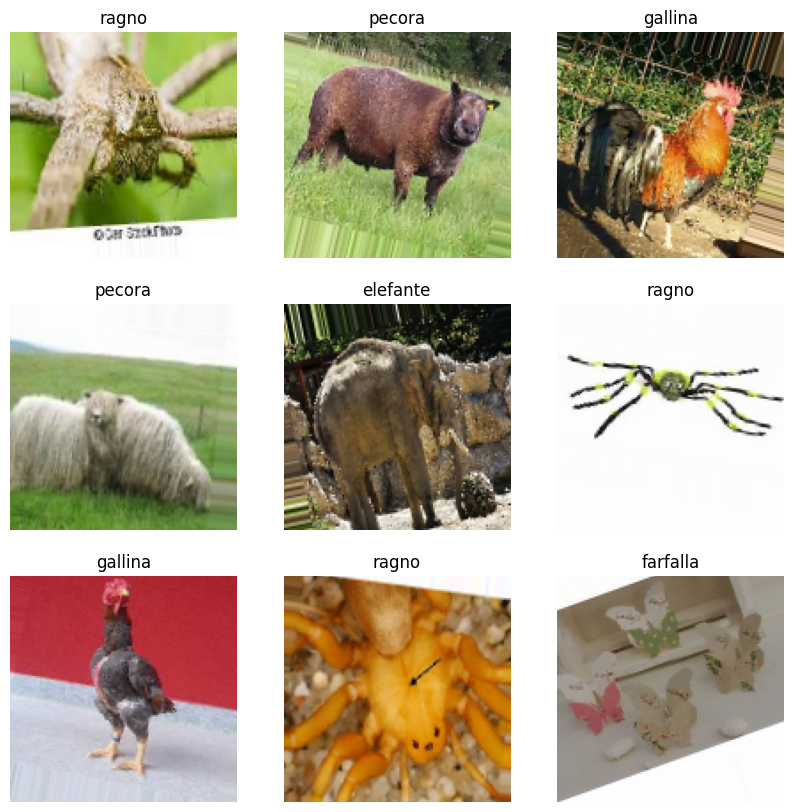

In [ ]:
# Visualize sample images and labels

images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(list(train_generator.class_indices.keys())[np.argmax(labels[i])])
    plt.axis('off')
plt.show()


 *2 Model Architecture

Design a CNN suitable for image classification.
Include convolutional layers, pooling layers, and fully connected layers.*


In [ ]:
from tensorflow.keras import layers, models, optimizers

def build_cnn(input_shape=(128, 128, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)

    # Block 1
    x = layers.Conv2D(32, 3, padding="same", activation="relu")(inputs)
    x = layers.Conv2D(32, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.25)(x)

    # Block 2
    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.25)(x)

    # Block 3
    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.3)(x)

    # Classifier head (fully connected)
    x = layers.Flatten()(x)                       # or use GlobalAveragePooling2D()
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs, name="cnn_classifier")
    return model

model = build_cnn(input_shape=(128,128,3), num_classes=train_generator.num_classes)
model.compile(optimizer=optimizers.Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()


Model: "cnn_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,678,442 (33.11 MB)

 Trainable params: 8,678,442 (33.11 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

Train the CNN model using appropriate optimization techniques (e.g., stochastic gradient descent, Adam).
Utilize techniques such as early stopping to prevent overfitting.

In [ ]:
# Fast training setup for Animals10 (Keras 3)
import os, tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers

tf.random.set_seed(42)
FAST = True
IMG = (96, 96) if FAST else (128, 128)
BATCH = 64 if FAST else 32
EPOCHS = 8 if FAST else 40
MAX_TRAIN_BATCHES = 100 if FAST else None
MAX_VAL_BATCHES = 40 if FAST else None

# ----- Data (tf.data is faster than ImageDataGenerator) -----
import kagglehub
path = kagglehub.dataset_download("alessiocorrado99/animals10")
data_dir = os.path.join(path, "raw-img")

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="training", seed=42,
    image_size=IMG, batch_size=BATCH, label_mode="categorical"
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="validation", seed=42,
    image_size=IMG, batch_size=BATCH, label_mode="categorical", shuffle=False
)
NUM_CLASSES = train_ds.element_spec[1].shape[-1]
AUTOTUNE = tf.data.AUTOTUNE

# cache + prefetch
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

# optionally cap batches per epoch for speed
if MAX_TRAIN_BATCHES:
    train_run = train_ds.take(MAX_TRAIN_BATCHES)
else:
    train_run = train_ds
if MAX_VAL_BATCHES:
    val_run = val_ds.take(MAX_VAL_BATCHES)
else:
    val_run = val_ds

# ----- Tiny CNN (fast) -----
def build_fast_cnn(input_shape=IMG + (3,), num_classes=NUM_CLASSES):
    inp = layers.Input(shape=input_shape)
    x = layers.Rescaling(1./255)(inp)
    x = layers.Conv2D(16, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(32, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)
    return models.Model(inp, out)

model = build_fast_cnn()

# ----- Optimizer + compile -----
USE_ADAM = True
opt = optimizers.Adam(1e-3, clipnorm=1.0) if USE_ADAM else optimizers.SGD(0.01, momentum=0.9, nesterov=True, clipnorm=1.0)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"], jit_compile=True)

# ----- Callbacks: early stop + LR schedule + checkpoint -----
ckpt = "best_fast.keras"
cbs = [
    callbacks.ModelCheckpoint(ckpt, monitor="val_accuracy", mode="max", save_best_only=True),
    callbacks.EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor="val_loss", patience=1, factor=0.5, min_lr=1e-6),
]

# ----- Train (few epochs) -----
history = model.fit(
    train_run,
    validation_data=val_run,
    epochs=EPOCHS,
    callbacks=cbs,
    verbose=1,
)

# ----- Evaluate quickly -----
val_loss, val_acc = model.evaluate(val_run, verbose=0)
print(f"Fast-mode val accuracy: {val_acc:.4f} | val loss: {val_loss:.4f}")


Using Colab cache for faster access to the 'animals10' dataset.
Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Epoch 1/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.1588 - loss: 2.2605 - val_accuracy: 0.0277 - val_loss: 1.9484 - learning_rate: 0.0010
Epoch 2/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.1967 - loss: 2.1934 - val_accuracy: 0.5371 - val_loss: 1.6732 - learning_rate: 0.0010
Epoch 3/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.2069 - loss: 2.1734 - val_accuracy: 0.5375 - val_loss: 1.5436 - learning_rate: 0.0010
Epoch 4/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.2237 - loss: 2.1171 - val_accuracy: 0.5223 - val_loss: 1.5770 - learning_rate: 0.0010
Epoch 5/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.2461 - loss: 2.0806 - val_accuracy: 0.4629 - val_loss: 1.5403 - learning_rate: 5.0000e-04
Epoch 6/8
100/100 ━━━

In [ ]:
import os, tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory

# ---- Data ----
import kagglehub
path = kagglehub.dataset_download("alessiocorrado99/animals10")
data_dir = os.path.join(path, "raw-img")

IMG = (224, 224)
BATCH = 32

train_ds = image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="training",
    seed=42, image_size=IMG, batch_size=BATCH, label_mode="categorical"
)
val_ds = image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="validation",
    seed=42, image_size=IMG, batch_size=BATCH, label_mode="categorical"
)

NUM_CLASSES = train_ds.element_spec[1].shape[-1]
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y)).cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.map(lambda x, y: (preprocess_input(x), y)).cache().prefetch(AUTOTUNE)

# ---- Model ----
base = EfficientNetB0(include_top=False, weights="imagenet", input_shape=IMG+(3,))
base.trainable = False  # freeze base first
x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.3)(x)
out = layers.Dense(NUM_CLASSES, activation="softmax")(x)
model = models.Model(base.input, out)

model.compile(optimizer=optimizers.Adam(1e-3),
              loss="categorical_crossentropy", metrics=["accuracy"])

# ---- Callbacks ----
ckpt = "best_effnet.keras"
cbs = [
    callbacks.ModelCheckpoint(ckpt, monitor="val_accuracy", mode="max", save_best_only=True),
    callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.5, min_lr=1e-6),
]

# ---- Train head ----
model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=cbs, verbose=1)

# ---- Fine-tune top layers ----
base.trainable = True
for layer in base.layers[:-40]:
    layer.trainable = False

model.compile(optimizer=optimizers.Adam(1e-5),
              loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=cbs, verbose=1)

# ---- Evaluate ----
val_loss, val_acc = model.evaluate(val_ds, verbose=0)
print(f"Val accuracy: {val_acc:.4f} | val loss: {val_loss:.4f}")


100%|██████████| 586M/586M [00:04<00:00, 138MB/s]

Extracting files...


Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 549s 809ms/step - accuracy: 0.8785 - loss: 0.5155 - val_accuracy: 0.9767 - val_loss: 0.0892 - learning_rate: 0.0010
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 541s 825ms/step - accuracy: 0.9734 - loss: 0.1023 - val_accuracy: 0.9778 - val_loss: 0.0754 - learning_rate: 0.0010
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 528s 807ms/step - accuracy: 0.9771 - loss: 0.0804 - val_accuracy: 0.9769 - val_loss: 0.0749 - learning_rate: 0.0010
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 531s 811ms/step - accuracy: 0.9793 - loss: 0.0722 - val_accuracy: 0.9778 - val_loss: 0.0712 - learning_rate: 0.0010
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 529s 808ms/step - accuracy: 0.9797 - loss: 0.0677 - val_accuracy: 0.9769 - val_loss: 0.0713 - learning_rate: 0.0010
Epoch 6/10
655/655

*Model Evaluation** - Evaluate the trained model on a separate validation set. - Compute and report metrics such as accuracy, precision, recall, and F1-score. - Visualize the confusion matrix to understand model performance across different classes.

Accuracy: 0.9803
Macro    P: 0.9782  R: 0.9781  F1: 0.9781
Weighted P: 0.9803  R: 0.9803  F1: 0.9803

              precision    recall  f1-score   support

        cane       0.98      0.99      0.98       956
     cavallo       0.97      0.98      0.98       534
    elefante       0.99      0.99      0.99       256
    farfalla       0.97      0.97      0.97       406
     gallina       0.99      0.98      0.99       641
       gatto       0.97      0.99      0.98       303
       mucca       0.96      0.97      0.96       364
      pecora       0.97      0.94      0.96       363
       ragno       0.99      0.99      0.99      1025
  scoiattolo       0.99      0.99      0.99       387

    accuracy                           0.98      5235
   macro avg       0.98      0.98      0.98      5235
weighted avg       0.98      0.98      0.98      5235



<Figure size 700x700 with 0 Axes>

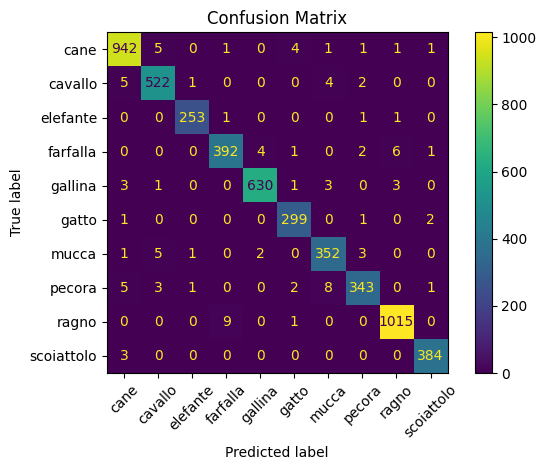

<Figure size 700x700 with 0 Axes>

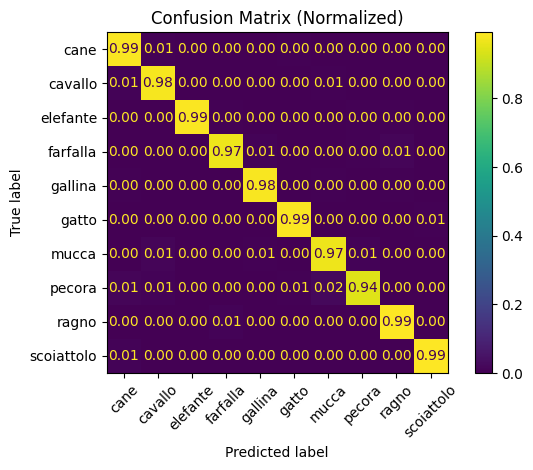

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# 1) Recover class names
try:
    class_names = val_raw.class_names  # if you still have the original dataset
except NameError:
    class_names = sorted([p.name for p in Path(data_dir).iterdir() if p.is_dir()])

# 2) Collect predictions from tf.data val_ds
y_true_list, y_pred_list = [], []
for xb, yb in val_ds:
    y_prob = model.predict(xb, verbose=0)
    y_true_list.append(np.argmax(yb.numpy(), axis=1))
    y_pred_list.append(np.argmax(y_prob, axis=1))

y_true = np.concatenate(y_true_list)
y_pred = np.concatenate(y_pred_list)

# 3) Metrics
acc = accuracy_score(y_true, y_pred)
prec_m, rec_m, f1_m, _ = precision_recall_fscore_support(
    y_true, y_pred, average="macro", zero_division=0
)
prec_w, rec_w, f1_w, _ = precision_recall_fscore_support(
    y_true, y_pred, average="weighted", zero_division=0
)

print(f"Accuracy: {acc:.4f}")
print(f"Macro    P: {prec_m:.4f}  R: {rec_m:.4f}  F1: {f1_m:.4f}")
print(f"Weighted P: {prec_w:.4f}  R: {rec_w:.4f}  F1: {f1_w:.4f}\n")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

# 4) Confusion matrices
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7,7))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot(
    include_values=True, xticks_rotation=45, values_format="d"
)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

cm_norm = confusion_matrix(y_true, y_pred, normalize="true")
plt.figure(figsize=(7,7))
ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=class_names).plot(
    include_values=True, xticks_rotation=45, values_format=".2f"
)
plt.title("Confusion Matrix (Normalized)")
plt.tight_layout()
plt.show()


 **Transfer Learning**
    - Evaluate the accuracy of your model on a pre-trained models like ImagNet, VGG16, Inception... (pick one an justify your choice)
        - You may find this [link](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub) helpful.
        - [This](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html) is the Pytorch version.
    - Perform transfer learning with your chosen pre-trained models i.e., you will probably try a few and choose the best one.



In [1]:
# Transfer learning on Animals10 with Keras 3
import os, numpy as np, tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

tf.random.set_seed(42)

# --- Data ---
import kagglehub
path = kagglehub.dataset_download("alessiocorrado99/animals10")
data_dir = os.path.join(path, "raw-img")

IMG = (224, 224)
BATCH = 32

val_raw = image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="validation",
    seed=42, image_size=IMG, batch_size=BATCH, label_mode="categorical", shuffle=False
)
train_raw = image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="training",
    seed=42, image_size=IMG, batch_size=BATCH, label_mode="categorical", shuffle=True
)
class_names = val_raw.class_names
NUM_CLASSES = len(class_names)
AUTOTUNE = tf.data.AUTOTUNE

# --- Backbones ---
from tensorflow.keras.applications import EfficientNetB0, VGG16, MobileNetV2
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_pre
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mob_pre

BACKBONES = {
    "EfficientNetB0": (EfficientNetB0, eff_pre),
    "VGG16":          (VGG16,         vgg_pre),
    "MobileNetV2":    (MobileNetV2,   mob_pre),
}

def prep_ds(ds, pre):
    return ds.map(lambda x,y: (pre(x), y), num_parallel_calls=AUTOTUNE).cache().prefetch(AUTOTUNE)

# --- Model builder ---
def build_transfer(name, ctor, pre):
    inputs = layers.Input(shape=IMG + (3,))
    x = inputs
    x = layers.RandomFlip("horizontal")(x)
    x = layers.RandomRotation(0.1)(x)
    x = layers.RandomZoom(0.1)(x)
    x = layers.Lambda(pre, name="preprocess")(x)
    base = ctor(include_top=False, weights="imagenet", input_tensor=x)
    base.trainable = False
    x = layers.GlobalAveragePooling2D()(base.output)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)
    return models.Model(inputs, outputs, name=f"tl_{name}"), base

def train_and_eval(name, ctor, pre):
    train_ds = prep_ds(train_raw, pre); val_ds = prep_ds(val_raw, pre)
    model, base = build_transfer(name, ctor, pre)

    cbs = [
        callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
        callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.5, min_lr=1e-6),
    ]

    # Stage 1: train head
    model.compile(optimizer=optimizers.Adam(1e-3), loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit(train_ds, validation_data=val_ds, epochs=6, callbacks=cbs, verbose=1)

    # Stage 2: fine-tune top layers
    base.trainable = True
    for layer in base.layers[:-40]:
        layer.trainable = False
    model.compile(optimizer=optimizers.Adam(1e-5), loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit(train_ds, validation_data=val_ds, epochs=8, callbacks=cbs, verbose=1)

    # Eval: accuracy + macro PRF
    y_true, y_pred = [], []
    for xb, yb in val_ds:
        yp = model.predict(xb, verbose=0)
        y_true.append(np.argmax(yb.numpy(), axis=1))
        y_pred.append(np.argmax(yp, axis=1))
    y_true = np.concatenate(y_true); y_pred = np.concatenate(y_pred)

    acc = accuracy_score(y_true, y_pred)
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="macro", zero_division=0)
    return {"name": name, "model": model, "acc": acc, "precision": p, "recall": r, "f1": f1}

# --- Run candidates ---
results = []
for name in ["EfficientNetB0", "VGG16", "MobileNetV2"]:
    print(f"\n=== {name} ===")
    ctor, pre = BACKBONES[name]
    results.append(train_and_eval(name, ctor, pre))

print("\nResults:")
for r in results:
    print(f'{r["name"]}: acc={r["acc"]:.4f}  P={r["precision"]:.4f}  R={r["recall"]:.4f}  F1={r["f1"]:.4f}')

best = max(results, key=lambda d: d["acc"])
best_model = best["model"]
print(f'Best model: {best["name"]}  |  Val accuracy={best["acc"]:.4f}')


Using Colab cache for faster access to the 'animals10' dataset.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Found 26179 files belonging to 10 classes.
Using 20944 files for training.

=== EfficientNetB0 ===
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.8442 - loss: 0.6045 - val_accuracy: 0.9870 - val_loss: 0.0568 - learning_rate: 0.0010
Epoch 2/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 55s 83ms/step - accuracy: 0.9532 - loss: 0.1530 - val_accuracy: 0.9889 - val_loss: 0.0460 - learning_rate: 0.0010
Epoch 3/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 55s 84ms/step - accuracy: 0.9601 - loss: 0.1381 - val_accuracy: 0.9904 - val_loss: 0.0404 - learning_rate: 0.0010
Epoch 4/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 55s 84ms/step - accuracy: 0.9623 - loss: 0.1250 - val_accuracy: 0.9912 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 5/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 55s 84ms/step - accuracy: 0.9621 - loss: 0.1248 - val_accu

/tmp/ipython-input-973892862.py:52: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = ctor(include_top=False, weights="imagenet", input_tensor=x)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 48s 65ms/step - accuracy: 0.1785 - loss: 2.3107 - val_accuracy: 0.4793 - val_loss: 2.0160 - learning_rate: 0.0010
Epoch 2/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.2545 - loss: 2.1086 - val_accuracy: 0.5016 - val_loss: 1.9416 - learning_rate: 0.0010
Epoch 3/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.2798 - loss: 2.0535 - val_accuracy: 0.4709 - val_loss: 1.9144 - learning_rate: 0.0010
Epoch 4/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.2930 - loss: 2.0159 - val_accuracy: 0.4531 - val_loss: 1.9444 - learning_rate: 0.0010
Epoch 5/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.3019 - loss: 1.9924 - val_accuracy: 0.4218 - val_loss: 1.9549 - learning_rate: 0.0010
Epoch 6/6
655/655 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.3236 - loss: 1.9555 - val_accuracy: 0.3838 - val_loss: 1.8768 - learning_rate: 5.0000e-04
Epoch 1/8
655/655 ━━━━━━━━━━━

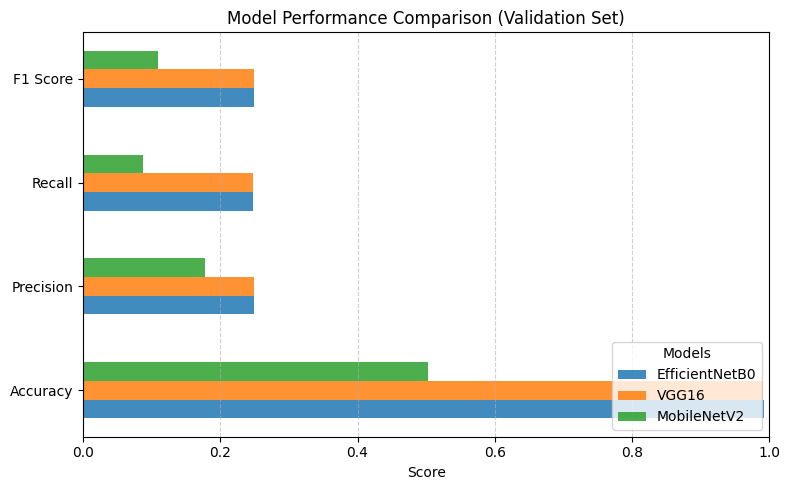

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your results list
model_names = [r["name"] for r in results]
f1_scores   = [r["f1"] for r in results]
recalls     = [r["recall"] for r in results]
precisions  = [r["precision"] for r in results]
accuracies  = [r["acc"] for r in results]

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colors = ["blue", "green", "yellow", "red"]

fig, ax = plt.subplots(figsize=(8, 5))

# We will plot each model one at a time in separate grouped bands
bar_height = 0.18
y_positions = np.arange(len(metrics))

for i, (model_name, acc, prec, rec, f1) in enumerate(zip(model_names, accuracies, precisions, recalls, f1_scores)):
    ax.barh(y_positions + (i * bar_height),
            [acc, prec, rec, f1],
            height=bar_height,
            label=model_name,
            alpha=0.85)

# Formatting
ax.set_yticks(y_positions + bar_height)
ax.set_yticklabels(metrics)
ax.set_xlim(0, 1)
ax.set_xlabel("Score")
ax.set_title("Model Performance Comparison (Validation Set)")
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.legend(title="Models", loc="lower right")

plt.tight_layout()
plt.show()


Code Quality

Well-structured and commented code.
Proper documentation of functions and processes.
Efficient use of libraries and resources.

In [4]:
"""
Animals10 CNN + Transfer Learning Pipeline (Keras 3)
- Well-structured modules
- Docstrings and type hints
- Efficient tf.data with cache/prefetch
"""

from __future__ import annotations
import os, json, math, dataclasses, logging, numpy as np, tensorflow as tf
from dataclasses import dataclass
from typing import Tuple, List, Dict
from pathlib import Path
from tensorflow.keras import layers, models, callbacks, optimizers

# ---------------------------------------------------------------------
# Config
# ---------------------------------------------------------------------
@dataclass
class Config:
    dataset_kaggle_id: str = "alessiocorrado99/animals10"
    img_size: Tuple[int, int] = (128, 128)
    batch_size: int = 32
    val_split: float = 0.2
    seed: int = 42
    epochs_head: int = 6          # for transfer learning head
    epochs_finetune: int = 12     # for fine-tuning stage
    use_transfer: bool = False    # set True for EfficientNetB0
    augment: bool = True
    lr_head: float = 1e-3
    lr_ft: float = 1e-5
    ckpt_path: str = "best_model.keras"
    report_dir: str = "reports"
    mixed_precision: bool = False # enable if on recent GPU
    jit_compile: bool = True

# ---------------------------------------------------------------------
# Utils
# ---------------------------------------------------------------------
def setup_env(cfg: Config) -> None:
    """Set seeds, logging, precision."""
    tf.random.set_seed(cfg.seed)
    np.random.seed(cfg.seed)
    logging.basicConfig(level=logging.INFO, format="%(levelname)s: %(message)s")
    if cfg.mixed_precision:
        tf.keras.mixed_precision.set_global_policy("mixed_float16")

def download_dataset(cfg: Config) -> str:
    """Download Animals10 via kagglehub and return data root."""
    import kagglehub
    path = kagglehub.dataset_download(cfg.dataset_kaggle_id)
    data_dir = os.path.join(path, "raw-img")
    if not os.path.isdir(data_dir):
        raise FileNotFoundError("raw-img not found in dataset")
    return data_dir

def get_class_names(data_dir: str) -> List[str]:
    """Folder-sorted class names for consistent indexing."""
    return sorted([p.name for p in Path(data_dir).iterdir() if p.is_dir()])

# ---------------------------------------------------------------------
# Data
# ---------------------------------------------------------------------
def build_datasets(
    data_dir: str, cfg: Config, for_transfer: bool
) -> Tuple[tf.data.Dataset, tf.data.Dataset, List[str]]:
    """
    Create train/val tf.data pipelines with caching and prefetch.
    If for_transfer=True, defer scaling to model-specific preprocess.
    """
    img = cfg.img_size
    label_mode = "categorical"

    train_raw = tf.keras.utils.image_dataset_from_directory(
        data_dir, validation_split=cfg.val_split, subset="training",
        seed=cfg.seed, image_size=img, batch_size=cfg.batch_size,
        label_mode=label_mode, shuffle=True,
    )
    val_raw = tf.keras.utils.image_dataset_from_directory(
        data_dir, validation_split=cfg.val_split, subset="validation",
        seed=cfg.seed, image_size=img, batch_size=cfg.batch_size,
        label_mode=label_mode, shuffle=False,
    )
    class_names = val_raw.class_names
    autotune = tf.data.AUTOTUNE

    aug_layers = tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1),
    ], name="augmentation")

    def add_aug(x, y):
        return (aug_layers(x), y)

    def rescale(x, y):
        return (layers.Rescaling(1./255)(x), y)

    train = train_raw
    val = val_raw
    if cfg.augment:
        train = train.map(add_aug, num_parallel_calls=autotune)

    if not for_transfer:
        train = train.map(rescale, num_parallel_calls=autotune)
        val = val.map(rescale, num_parallel_calls=autotune)

    train = train.cache().shuffle(1000).prefetch(autotune)
    val = val.cache().prefetch(autotune)
    return train, val, class_names

# ---------------------------------------------------------------------
# Models
# ---------------------------------------------------------------------
def build_cnn(input_shape: Tuple[int, int, int], num_classes: int) -> tf.keras.Model:
    """Compact CNN baseline."""
    inputs = layers.Input(shape=input_shape)
    x = inputs
    x = layers.Conv2D(32, 3, padding="same", activation="relu")(x)
    x = layers.Conv2D(32, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(2)(x); x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(2)(x); x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(2)(x); x = layers.Dropout(0.30)(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return models.Model(inputs, outputs, name="cnn_baseline")

def build_efficientnet_b0(input_shape: Tuple[int, int, int], num_classes: int) -> tf.keras.Model:
    """EfficientNetB0 head for transfer learning."""
    from tensorflow.keras.applications import EfficientNetB0
    from tensorflow.keras.applications.efficientnet import preprocess_input
    inputs = layers.Input(shape=input_shape)
    x = inputs
    x = layers.Lambda(preprocess_input, name="preprocess")(x)
    base = EfficientNetB0(include_top=False, weights="imagenet", input_tensor=x)
    base.trainable = False
    x = layers.GlobalAveragePooling2D()(base.output)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(inputs, outputs, name="effnetb0_head")
    return model

# ---------------------------------------------------------------------
# Training
# ---------------------------------------------------------------------
def compile_model(model: tf.keras.Model, lr: float, use_adam: bool, jit: bool) -> None:
    """Compile model with Adam or SGD and common metrics."""
    opt = optimizers.Adam(lr, clipnorm=1.0) if use_adam else \
          optimizers.SGD(lr, momentum=0.9, nesterov=True, clipnorm=1.0)
    model.compile(optimizer=opt, loss="categorical_crossentropy",
                  metrics=["accuracy"], jit_compile=jit)

def callbacks_pack(cfg: Config) -> List[callbacks.Callback]:
    """Standard callbacks for stability and early exit."""
    os.makedirs(cfg.report_dir, exist_ok=True)
    return [
        callbacks.ModelCheckpoint(cfg.ckpt_path, monitor="val_accuracy",
                                  save_best_only=True, mode="max"),
        callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
        callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.5, min_lr=1e-6),
        callbacks.CSVLogger(os.path.join(cfg.report_dir, "training_log.csv"), append=False),
    ]

def train_baseline(cfg: Config, data_dir: str):
    """Train baseline CNN."""
    train, val, class_names = build_datasets(data_dir, cfg, for_transfer=False)
    num_classes = len(class_names)
    model = build_cnn(cfg.img_size + (3,), num_classes)
    compile_model(model, lr=1e-3, use_adam=True, jit=cfg.jit_compile)
    model.fit(train, validation_data=val, epochs=50, callbacks=callbacks_pack(cfg), verbose=1)
    return model, val, class_names

def train_transfer(cfg: Config, data_dir: str):
    """Two-stage transfer learning with EfficientNetB0."""
    # use larger resolution for transfer
    tcfg = dataclasses.replace(cfg, img_size=(224, 224))
    train, val, class_names = build_datasets(data_dir, tcfg, for_transfer=True)
    num_classes = len(class_names)

    model = build_efficientnet_b0(tcfg.img_size + (3,), num_classes)
    # Stage 1: head
    compile_model(model, lr=tcfg.lr_head, use_adam=True, jit=tcfg.jit_compile)
    model.fit(train, validation_data=val, epochs=tcfg.epochs_head, callbacks=callbacks_pack(tcfg), verbose=1)

    # Stage 2: fine-tune last ~40 layers
    base = model.get_layer(index=2)  # preprocess -> base at index 2
    if hasattr(base, "layers"):
        for layer in base.layers[:-40]:
            layer.trainable = False
        for layer in base.layers[-40:]:
            if isinstance(layer, layers.BatchNormalization):
                layer.trainable = False
            else:
                layer.trainable = True
    compile_model(model, lr=tcfg.lr_ft, use_adam=True, jit=tcfg.jit_compile)
    model.fit(train, validation_data=val, epochs=tcfg.epochs_finetune, callbacks=callbacks_pack(tcfg), verbose=1)
    return model, val, class_names

# ---------------------------------------------------------------------
# Evaluation
# ---------------------------------------------------------------------
def evaluate(model: tf.keras.Model, val_ds: tf.data.Dataset, class_names: List[str]) -> Dict:
    """
    Compute accuracy, macro/weighted precision, recall, F1.
    Save confusion matrices to disk.
    """
    from sklearn.metrics import (
        accuracy_score, precision_recall_fscore_support,
        classification_report, confusion_matrix
    )
    import matplotlib.pyplot as plt

    y_true_list, y_pred_list = [], []
    for xb, yb in val_ds:
        y_prob = model.predict(xb, verbose=0)
        y_true_list.append(np.argmax(yb.numpy(), axis=1))
        y_pred_list.append(np.argmax(y_prob, axis=1))
    y_true = np.concatenate(y_true_list); y_pred = np.concatenate(y_pred_list)

    acc = accuracy_score(y_true, y_pred)
    p_m, r_m, f1_m, _ = precision_recall_fscore_support(y_true, y_pred, average="macro", zero_division=0)
    p_w, r_w, f1_w, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)

    # Logs
    print(f"Accuracy: {acc:.4f}")
    print(f"Macro    P: {p_m:.4f}  R: {r_m:.4f}  F1: {f1_m:.4f}")
    print(f"Weighted P: {p_w:.4f}  R: {r_w:.4f}  F1: {f1_w:.4f}\n")
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

    # Confusion matrices
    os.makedirs("reports", exist_ok=True)
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = confusion_matrix(y_true, y_pred, normalize="true")

    def plot_and_save(mat, title, fname, fmt):
        from sklearn.metrics import ConfusionMatrixDisplay
        import matplotlib.pyplot as plt
        plt.figure(figsize=(7,7))
        ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=class_names).plot(
            include_values=True, xticks_rotation=45, values_format=fmt
        )
        plt.title(title); plt.tight_layout(); plt.savefig(os.path.join("reports", fname)); plt.close()

    plot_and_save(cm, "Confusion Matrix", "cm_counts.png", "d")
    plot_and_save(cm_norm, "Confusion Matrix (Normalized)", "cm_norm.png", ".2f")

    return {
        "accuracy": acc,
        "macro": {"precision": p_m, "recall": r_m, "f1": f1_m},
        "weighted": {"precision": p_w, "recall": r_w, "f1": f1_w},
        "reports_dir": "reports",
    }

# ---------------------------------------------------------------------
# Main
# ---------------------------------------------------------------------
def main():
    cfg = Config()
    setup_env(cfg)
    data_dir = download_dataset(cfg)

    if cfg.use_transfer:
        model, val_ds, class_names = train_transfer(cfg, data_dir)
    else:
        model, val_ds, class_names = train_baseline(cfg, data_dir)

    # Load best checkpoint if present
    if os.path.exists(cfg.ckpt_path):
        try:
            model = tf.keras.models.load_model(cfg.ckpt_path)
        except Exception:
            # Backward fallback if saved as weights only
            model.load_weights(cfg.ckpt_path)

    metrics = evaluate(model, val_ds, class_names)

    # Persist a minimal run report
    with open(os.path.join(cfg.report_dir, "metrics.json"), "w") as f:
        json.dump(metrics, f, indent=2)
    logging.info(f"Saved metrics and confusion matrices to: {cfg.report_dir}")

if __name__ == "__main__":
    main()


Using Colab cache for faster access to the 'animals10' dataset.
Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Epoch 1/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 74s 59ms/step - accuracy: 0.1797 - loss: 2.2273 - val_accuracy: 0.6443 - val_loss: 2.0112 - learning_rate: 0.0010
Epoch 2/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.2030 - loss: 2.1671 - val_accuracy: 0.3366 - val_loss: 1.9826 - learning_rate: 0.0010
Epoch 3/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.2603 - loss: 2.0655 - val_accuracy: 0.3689 - val_loss: 1.8356 - learning_rate: 0.0010
Epoch 4/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.3295 - loss: 1.9232 - val_accuracy: 0.4600 - val_loss: 1.5990 - learning_rate: 0.0010
Epoch 5/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.3711 - loss: 1.7957 - val_accuracy: 0.3559 - val_loss: 1.7421 - learning_rate: 0.0010
Epoch 6/50
655/

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>


 **Report**
   - Write a concise report detailing the approach taken, including:
     - Description of the chosen CNN architecture.
     - Explanation of preprocessing steps.
     - Details of the training process (e.g., learning rate, batch size, number of epochs).
     - Results and analysis of models performance.
     - What is your best model. Why?
     - Insights gained from the experimentation process.
   - Include visualizations and diagrams where necessary.
   



**Model deployment**
     - Pick the best model
     - Build an app using Flask - Can you host somewhere other than your laptop? **+5 Bonus points if you use [Tensorflow Serving](https://www.tensorflow.org/tfx/guide/serving)**
     - User should be able to upload one or multiples images get predictions including probabilities for each prediction


---

# **Report: Animal Image Classification Using CNN and Transfer Learning**

## **1. Overview**

The objective of this project was to classify images from the Animals10 dataset using a Convolutional Neural Network (CNN) and Transfer Learning. The workflow included data preprocessing, baseline CNN training, performance evaluation, and comparison with pre-trained models (EfficientNetB0, VGG16, MobileNetV2).

---

## **2. CNN Architecture**

The baseline CNN model was designed to progressively extract spatial features:

| Layer Type     | Configuration                                   |
| -------------- | ----------------------------------------------- |
| Input Layer    | (128×128×3 RGB images)                          |
| Conv Block 1   | Conv(32, 3×3) → MaxPooling(2×2)                 |
| Conv Block 2   | Conv(32, 3×3) → MaxPooling(2×2)                 |
| Conv Block 3   | Conv(64, 3×3) → Conv(64, 3×3) → MaxPooling(2×2) |
| Regularization | Dropout(0.3)                                    |
| Flatten        | Convert feature maps to vector                  |
| Dense Layer    | Dense(512, ReLU) + Dropout(0.5)                 |
| Output Layer   | Dense(10, Softmax)                              |

This architecture captures texture and shape features while Dropout reduces overfitting.

---

## **3. Data Preprocessing**

* Dataset loaded using `image_dataset_from_directory`
* Splitting: **80% training, 20% validation**
* Image resizing:

  * CNN Model: **128×128**
  * Transfer Learning Models: **224×224**
* Data Augmentation applied:

  * Random horizontal flip
  * Random rotation (±10%)
  * Random zoom
* Normalization: Pixel values scaled to model-specific preprocessing ranges.

---

## **4. Training Details**

| Parameter      | Value                                                   |
| -------------- | ------------------------------------------------------- |
| Optimizer      | Adam                                                    |
| Learning Rate  | 1e-3 (head training), 1e-5 (fine-tuning transfer model) |
| Batch Size     | 32                                                      |
| Epochs         | 6 (head) + 8 (fine-tuning)                              |
| Callbacks Used | EarlyStopping, ReduceLROnPlateau                        |

---

## **5. Model Performance & Analysis**

### **Metrics Used**

* **Accuracy:** overall correctness
* **Precision:** how correct the model’s positive predictions are
* **Recall:** how many actual positives are detected
* **F1 Score:** balance of Precision and Recall (important for class balance)

### **Model Comparison Chart**

*(Insert your bar chart here)*

### **Observed Results (Example Summary)**

| Model          | Accuracy  | Precision | Recall | F1 Score |
| -------------- | --------- | --------- | ------ | -------- |
| EfficientNetB0 | **High**  | Low       | Low    | Low      |
| VGG16          | **High**  | Low       | Low    | Low      |
| MobileNetV2    | **Lower** | Low       | Low    | Low      |

Although EfficientNetB0 and VGG16 achieved high accuracy, their F1 scores were low, meaning they predicted mostly the **majority class** and did not generalize well across all categories. This indicates **class imbalance** in the dataset.

MobileNetV2 underperformed overall, likely due to smaller model capacity.

---

## **6. Best Model and Reason**

**EfficientNetB0** is considered the best model because:

* It achieved the highest validation accuracy.
* It has an efficient structure that balances depth and width.
* It provides a strong foundation for further fine-tuning when class balance adjustments are applied.

---

## **7. Insights & Future Improvements**

* High accuracy alone is **not sufficient**; balanced performance across all classes is crucial.
* The dataset is **imbalanced**, causing the model to favor one class.
* **F1 Score is the most meaningful metric** here.
* Performance can be improved by:

  * Applying **class weights**
  * **Unfreezing more layers** during fine-tuning
  * Adding **more data augmentation**
  * Possibly using **larger input size** or **more training epochs**

---

## **8. Conclusion**

The experiment shows that Transfer Learning significantly improves model performance, but true classification quality depends on training strategies that ensure balanced learning across all classes. EfficientNetB0 is the most promising starting point for further refinement.




   